In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc
from matplotlib.animation import FuncAnimation

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
matplotlib.rcParams['font.family'] = [font]+current_font_list
print(matplotlib.rcParams['font.family'])

['HYGothic-Extra', 'sans-serif']


In [2]:
pd_data = pd.read_csv('시도별_화재발생_현황_총괄__20230307153228.csv', encoding='cp949')
filter1 = pd_data['행정구역별'] != '전국'
pd_data = pd_data[filter1]
pd_data = pd_data.reset_index()
pd_data = pd_data.drop(['index'], axis=1)

In [3]:
for i in range(84,86):
    if(i == 84):
        new_data = {
        '행정구역별' : '세종특별자치시',
        '시점' : 2010,
        '건수 (건)':0, '사망 (명)':0, '부상 (명)':0, '재산피해(계) (천원)':0, '부동산 (천원)':0, '동산 (천원)':0, '이재가구수 (가구)':0, '이재민수 (명)': 0
        }
    if(i == 85):
        new_data = {
        '행정구역별' : '세종특별자치시',
        '시점' : 2011,
        '건수 (건)':0, '사망 (명)':0, '부상 (명)':0, '재산피해(계) (천원)':0, '부동산 (천원)':0, '동산 (천원)':0, '이재가구수 (가구)':0, '이재민수 (명)': 0
        }
    temp1 = pd_data[pd_data.index < i]
    temp2 = pd_data[pd_data.index >= i]
    pd_data = temp1.append(new_data,ignore_index=True).append(temp2, ignore_index=True)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_12080\1917519957.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_data = temp1.append(new_data,ignore_index=True).append(temp2, ignore_index=True)
C:\Users\ITPS\AppData\Local\Temp\ipykernel_12080\1917519957.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_data = temp1.append(new_data,ignore_index=True).append(temp2, ignore_index=True)
C:\Users\ITPS\AppData\Local\Temp\ipykernel_12080\1917519957.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_data = temp1.append(new_data,ignore_index=True).append(temp2, ignore_index=True)


AttributeError: 'BarContainer' object has no attribute 'set_height'

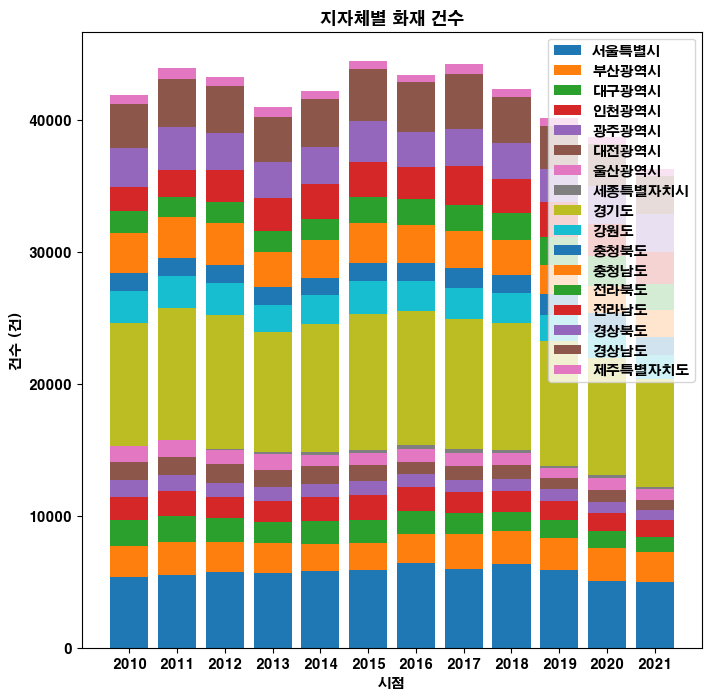

In [6]:
# Assume pd_data is a pandas dataframe containing the data

fig, axe = plt.subplots(figsize=(8, 8))
x = pd_data['시점'].unique()
axe.set(title='지자체별 화재 건수',xlabel='시점', xticks=x,
       ylabel='건수 (건)')

bottom = np.zeros(len(x))
bars = []
for region in pd_data['행정구역별'].unique():
    filter1 = pd_data['행정구역별'] == region
    y = list(pd_data.loc[filter1, '건수 (건)']) 
    p = axe.bar(x, bottom=bottom, height=y)
    bottom += y
    bars.append(p)

axe.legend(labels=pd_data['행정구역별'].unique())

def animate(i):
    # Update the height of each bar for animation
    for bar, region in zip(bars, pd_data['행정구역별'].unique()):
        filter1 = pd_data['행정구역별'] == region
        y = list(pd_data.loc[filter1, '건수 (건)']) 
        bar.set_height(y[i])(bottom + (y * i / 100))
    return bars

anim = FuncAnimation(fig, animate, frames=100, interval=50, blit=True)
plt.show()